In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 4.2 손실 함수
#### 4.2.1 평균 제곱 오차
$$E = \frac{1}{2} \sum_{k}^{} (y_k - t_k)^2$$

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 신경망 출력 
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 레이블 (원-핫 인코딩)

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
# 2 ?
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [5]:
# 7 ?
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

#### 4.2.2 교차 엔트로피
$$E = - \sum_{k}^{} t_k\log y_k$$

In [6]:
# tk가 1일 때의 yk의 자연로그를 계산해서 정답을 추정 (오류가 0인 경우, log1 = 0) 
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
# 2 ?
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [8]:
# 7 ?
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

#### 4.2.3 미니배치 학습
$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_k\log y_k$$

In [10]:
# 데이터셋을 읽어옴
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
# 무작위로 10개 추출
print(np.random.choice(60000, 10))

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

[25513 11980  1237 16216 31285 19763 11708 31980 18838 32506]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [12]:
# 0과 1의 원-핫 인코딩일 경우의 교차 엔트로피
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원, 데이터 하나당 교차 엔트로피의 오차를 구하는 경우는 reshape
        t = t.reshape(1, t.size) # 정답 레이블 
        y = t.reshape(1, y.size) # 신경망 출력
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size # 배치의 크기만큼 정규화해서 교차 엔트로피를 계산

In [13]:
# 숫자 레이블일 경우의 교차 엔트로피
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size # 레이블일 때는 레이블에 해당하는 바로 읽고 정규화

### 4.3 수치 미분
#### 4.3.1 미분

In [14]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x))/h

In [15]:
import numpy as np
np.float64(1e-50)

1e-50

In [16]:
np.float32(1e-50)

0.0

#### 4.3.2 수치 미분의 예

0.1999999999990898
0.2999999999986347


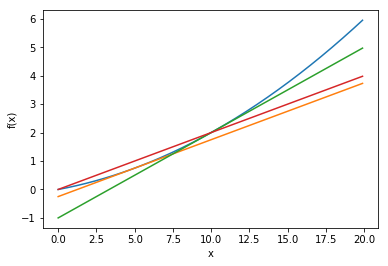

In [17]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tx1, tx2 = 5, 10
tf1 = tangent_line(function_1, tx1)
tf2 = tangent_line(function_1, tx2)
ty1 = tf1(x)
ty2 = tf2(x)

plt.plot(x, y)
plt.plot(x, ty1)
plt.plot(x, ty2)
plt.plot(x, (lambda t: numerical_diff(function_1, tx1)*t)(x))
plt.show() 

#### 4.3.3 편미분
$$f(x_0, x_1) = x_0^2 + x_1^2 $$
$$\frac{\partial f}{\partial x_0} or \frac{\partial f}{\partial x_1}$$

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2 # or return np.sum(x**2)

In [19]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분 
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

# x0 = 3, x1 = 4일 때, x1에 대한 편미분 
def function_tmp2(x1):
    return 3.0**2 + x1*x1

In [20]:
print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


### 4.4 기울기
$$\left(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}\right)$$

In [21]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        fxh1 = f(x)
        v = x[idx]
        x[idx] = v + h
        fxh1 = f(x)
        
        x[idx] = v - h
        fxh2 = f(x)
    
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = v
        
    return grad

In [22]:
grad1 = numerical_gradient(function_2, np.array([3.0, 4.0]))
grad2 = numerical_gradient(function_2, np.array([0.0, 2.0]))
grad3 = numerical_gradient(function_2, np.array([3.0, 0.0]))

In [23]:
print(grad1)
print(grad2)
print(grad3)

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


/home/luno/.pyenv/versions/3.6.0/envs/jupyter-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


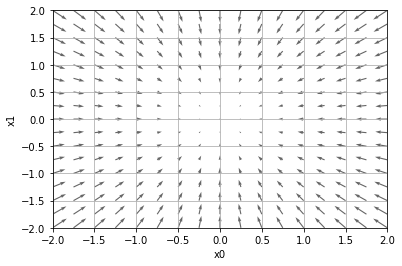

In [24]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
# print("x0:", x0)
# print("x1:", x1)
X, Y = np.meshgrid(x0, x1)
# print("X:", X)
X = X.flatten()
Y = Y.flatten()
# print("X.flatten:", X)
grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)
$$ x_0 = x_0 - \eta{\frac{\partial f}{\partial x_0}}$$
$$ x_1 = x_1 - \eta{\frac{\partial f}{\partial x_1}}$$

In [25]:
# f 최적화 함수
# lr learning rate
# step_num 반복수 
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [27]:
# 학습률이 너무 큰 예 : lr=10.0
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [28]:
# 학습률이 너무 작은 예: lr=1e-10
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

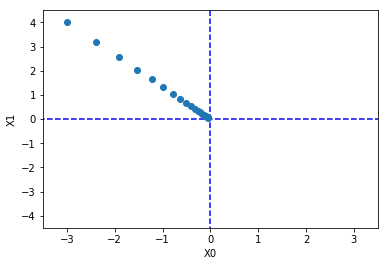

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 신경망에서의 기울기

$$
\begin{equation*}
\mathbf{W} =  \begin{pmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32}
\end{pmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\mathbf{\frac{\partial L}{\partial W}} =  \begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial W_{31}} \\
\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial W_{22}} & \frac{\partial L}{\partial W_{32}}
\end{pmatrix}
\end{equation*}
$$

In [30]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W)

[[-0.16579632 -1.08843762 -0.51622433]
 [ 0.52293271 -0.16770464 -0.43216847]]


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.37116165 -0.80399675 -0.69868622]


In [32]:
np.argmax(p)

0

In [33]:
t = np.array([0,0,1])
net.loss(x, t)

1.5717320946785465

In [34]:
dW = numerical_gradient(lambda W: net.loss(x,t), net.W)
print(dW)

[[ 0.36323333  0.11215558 -0.47538892]
 [ 0.54485     0.16823337 -0.71308337]]


### 4.5 학습 알고리즘 구현하기
1단계. 미니배치 -> 2단계. 기울기 산출 -> 3단계. 매개변수 갱신 -> 4단계. 1~3단계 반복

하나의 입력 $x$에 대한 출력을 $d$라고 하고, 다음과 같이 입출력의 쌍이 여러 개 주어졌을 때, 

$$\{(x_1, d_1), (x_2, d_2), ..., (x_n, d_n)\}$$

이 입출력 쌍 $(x, d)$ 하나하나를 **훈련 샘플(training sample)** 이라 부르고, 그 집합을 **훈련 데이터(training data)**라고 한다.

이 때, 신경망의 가중치 $w$를 조정하여, 모든 입출력 쌍 $(x_n, d_n)(n = 1, ..., N)$ 입력 $x_n$이 주어진 신경망의 출력 $y(x_n; w)$이 최대한 $d_n$과 가까워지도록 하는 과정을 **학습**이라고 부른다


#### 4.5.1 2층 신경망 클래스 구현하기

두 개의 레이어이므로 그 구성은 다음 그림과 같다. 

<img src=http://neuralnetworksanddeeplearning.com/images/tikz35.png>

2층 구조의 신경망이다. l=1인 층을 입력층, l=2인 층을 은닉층, l=3인 층을 출력층이라고 부른다.

각 층 $l + 1$ 의 유닛의 출력 $a^{l+1}$은 다음과 같이 일반화할 수 있다.
$$u^{l+1} = W^(l+1)z^(l) + b^(l+1)$$
$$a^{l+1} = f(u^(l+1))$$

#### 활성화 함수
활성화 함수는 보통 실수 전체를 정의역으로 시그모이드 함수, 램프 함수, 맥스 아웃 함수 등이 있다.
- 시그모이드 함수: 실수 전체를 정의역으로, (0, 1)을 치역으로 가진다.
$$ f(u) = \frac{1}{1 + e^{-u}} $$

- 쌍곡선 정접 함수: (-1, 1)의 치역을 갖는다.
$$ f(u) = tanh(u) $$

- 램프 함수 (ramp function, rectified linear function): u < 0인 부분을 0으로 바꾼 단순 함수이다. 단순하고 계산량이 적다. 학습이 빠르고 최종결과도 더 좋은 경우가 많아 가장 많이 사용되고 있다.
$$ f(u) = max(u, 0) $$

- 맥스아웃 함수: 각각의 총 입력을 유닛별로 따로 계산한 후, 그 중한다. 최대값을 유닛의 출력으로 한다.   
$$ f(u_j) = max (u_jk) (k=1,...,K) $$

- 항등 사상: 회귀 문제를 위한 신경망에서 사용한다.
$$ f(u) = u $$

- 소프트맥스 함수: 클래스 분류를 위한 신경망에서 사용한다. 출력의 합이 항상 1이 된다. 모든 유닛의 총 입력으로부터 결정되는 점이 다른 활성화 함수와 다르다. 지수 함수에 따른 오버플로우를 방지하기 위해, 보통 입력값 중 최대값을 기준으로 정규화한다.
$$ f(u) = \frac{\exp({u_k})}{\sum_{j=1}^{k} \exp({u_j})} $$

#### 오차 함수
오차함수의 종류는 다음과 같다

| 문제의 유형 | 활성화 함수 | 오차 함수
| :- |:-----------------:| ----------------
| 회귀 | 항등사상 |  $ 제곱 오차 $ 
| 이진 분류 |  시그모이드 (또는 로지스틱함수) |$ 교차 엔트로피 $ 
| 클래스 분류 | 소프트맥스 함수 | 교차 엔트로피

#### 신경망 파라미터 벡터
신경망 유닛의 바이어스와 가중치의 모든 성분으로 구성되는 벡터를$\textbf{w}$를 정의해 $y(\textbf{x};\textbf{w})$로 표기한다. (곳에 따라 바이어스와 가중치를 구분하지 않고 일괄 $\theta$로 표기하기도 한다.)

#### 회귀 
제곱오차를 합한 후 이를 반으로 나눈 값을 계산하고, 이 값이 최소가 되는 $w$를 선택한다. 2로 나누는 것은 미분하면 2가 곱해지는 것을 상쇄하기 위해서이다. 

$$ E(w) = \frac{1}{2}\sum_{i=1}^{n} \parallel d_n - y(\textbf{x_n};w) \parallel^2 $$

#### 이진 분류
- 통계에서 확률변수 $x_1, x_2, \dots, x_n$가 서로 독립이고, 확률밀도함수 $f(x; \theta)$의 확률표본이면 우도함수는 다음과 같다.

$$ L(\theta \mid x_1, ..., x_n) = f(x_1, x_2, ..., x_n \mid \theta) = \prod_{i=1}^{n} f(x_i \mid \theta ) $$

- 위와 같이 우도함수는 곱해진 형태이기 때문에 로그를 취하여 더해진 형태로 표시한다. 보통 비선형 데이터나 정규 분포가 아닌 경우, 로그를 취해 선형 데이터로 변경한다. 이렇게 하면 원래의 데이터에 로그변환을 취한 것의 차분이 원데이터의 변화율이 된다.  

$$ l(\theta) = logL(\theta) = \sum_{i=1}^{n}logf(x_i \mid \theta) $$

- 주어진 입력 x에 따라 두 종류를 구별할 때, $d = 0$은 여자, $d = 1$을 남자라고 하면, 종류는 이진 변수 $ d \in \{ 0, 1\} $가 된다. 
- 주어진 $\textbf{x}$에 대한 $d$의 추정은 사후확률 $p(d = 1 \mid \textbf{x})$로 모델화하여, 그 값이 0.5를 넘으면 d = 1, 그렇지 않으면 d = 0 으로 판단한다.
- 신경망 전체의 입출력함수 $y(\textbf{x}; \textbf{w})$를 $p(d = 1 \mid \textbf{x})$로 수식화하여 데이터의 사후분포가 가장 잘맞는 신경망의 파라미터 $w$를 조정한다. 즉, $\textbf{w}$에 대한 우도를 구해, 가장 큰 $\textbf{w}$의 값을 선택한다. 이를 최대우도법 (maximum likelihood estimation)이라 한다.   
- 사후 분포는 다음과 같이 풀 수 있다.

$$ p(d \mid \textbf{x} ) = p(d=1 \mid \textbf{x})^{d}p(d=0 \mid x)^{1-d} $$

- 확률의 총합은 1이므로, $ p(d = 0 \mid \textbf{x}) = 1 - y(x; w) $를 유도할 수 있다.
- 따라서, $w$를 가장 크게 하는 최대우도 함수는 다음과 같이 주어진다.

$$ L(w) \equiv \prod_{i=1}^{N} p(d_n \mid \textbf{x};\textbf{w}) = \
   \prod_{i=1}^{N} {\{ y(\textbf{x}_n;\textbf{w}) \}}^{d_n} {\{ 1 - y(\textbf{x}_n;\textbf{w}) \}}^{1-d_n} $$
    
- 따라서 최대화 대신 최소화하기 위해 부호를 바꾼 오차함수는 다음과 같다.

$$ E(w) = -\sum_{n=1}^{N}[d_nlog\{y(\textbf{x}_n;\textbf{w})\} + (1-d_n)log\{(1-y(\textbf{x}_n;\textbf{w})\}) ] $$

#### 클래스 분류
클래스 분류도 그 원리는 이진 분류와 동일히다. 

- 클래스를 $C_1, \dots, C_k$라고 했을 때, 출력 $y_k$은 입력 $\textbf{x}$가 클래스 $C_k$에 속할 확률을 나타낸다. 이 때, $y_1, \dots, y_k$의 총합은 항상 1이 된다. 출력 함수 $y_k$로 사용되는 소프트맥수 함수는 다음과 같다.

$$ y_k = \frac{exp(u_k)}{\sum_{j=1}^{K}exp(u_j)} $$

- 신경망의 이진값을 $K$개 열거한 벡터 $\textbf{d}_n = [d_n1, ..., d_nk]^\top $로 표현할 때
- 입력 $\textbf{x}_n$이 숫자 2이고, 정답 클래스가 $C_3$일 때, 이 입력의 목표 출력은 다음과 같다.

$$ \textbf{d}_n = [ 0 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 ]^\top $$

- 이에 대한 사후 분포는 다음과 같다. 
$$ p(\textbf{d}|x) = \prod_{k=1}^{K}p(C_k|x)^{d_k}) $$

- 따라서 우도함수에 소프트맥스 함수를 이용해서 표기하면 다음과 같다.
$$ L(w) = \prod_{n=1}^{N}p(d_n \mid \textbf{x_n};\textbf{w}) = \prod_{n=1}^{N}\prod_{k=1}^{K}p(\textbf{C}_k \mid\textbf{x}_n)^{d_nk} = \prod_{n=1}^{N}\prod_{k=1}^{K}(y_k(\textbf{x};\textbf{w}))^{d_nk} $$ 

- 이 우도에 로그를 취하여 부호를 반전한 것을 오차함수로 삼는다. 이를 교차 엔트로피라고 한다. 

$$ E(w) = - \sum_{n=1}^{N}\sum_{k=1}^{K}d_{nk}logy_{k}(x_n;w) $$

- 데이터가 $\textbf{N}$개이고, 클래스가 $\textbf{K}$개 일 때, $(\textbf{x}_n;\textbf{w})$은 신경망 출력이이다. $d_nk$은 n번째 데이터의 k클래스에 대한 값으로 $k$에 해당하는 원소만 1이고, 나머지는 0이다. (이를 원-핫 인코딩이라고 한다.) 마지막을 $\textbf{N}$으로 나누어 정규화하여 훈련 데이터의 개수에 관련없는 평균 손실함수를 구하기도 한다.

In [ ]:
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1 
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [36]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


#### 4.5.2 미니배치 학습 구현하기

In [37]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

#### 4.5.3 시험 데이터로 평가하기

In [1]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc: {:0.3f}, test_acc: {:0.3f}".format(train_acc, test_acc))

NameError: name 'load_mnist' is not defined

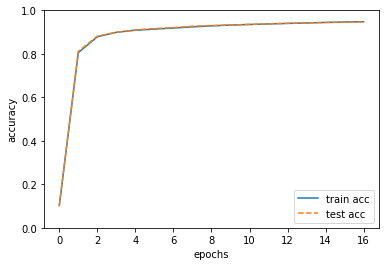

In [39]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()